In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
def create_samples(random_start=0,num_of_samples=1,size=1000):

    datasets = []
    for i in range(random_start,random_start+num_of_samples):
        # Set the seed for reproducibility
        np.random.seed(i)

        # Set the mean and standard deviation for the normal distribution
        mean = 100
        std_dev = 10

        # Generate an array of normally distributed random numbers 
        random_array = np.random.normal(mean, std_dev, size) 
        datasets.append(random_array)

    return datasets

In [3]:
#Generate sample
samples = create_samples(random_start=0,num_of_samples=100,size=10000)

In [4]:
# plt.hist(samples[0], bins=100, density=True)
# plt.xlabel('Value')
# plt.ylabel('Frequency')
# plt.title('Distribution of Created Numbers')
# plt.show()

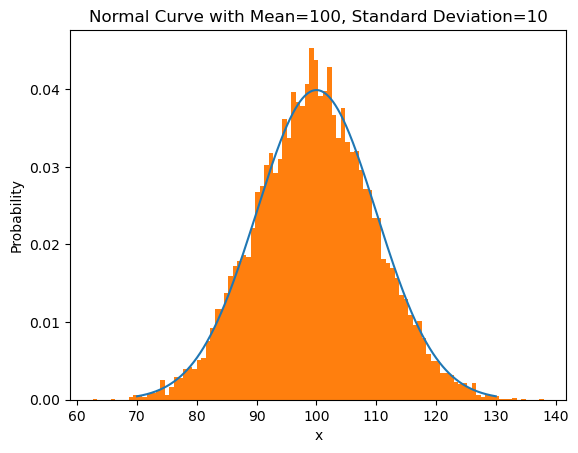

In [5]:
# Set the mean and standard deviation for the data 
mean = 100
std_dev = 10

# Define the mean of x values to plot
x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 1000)

# Calculate the corresponding y values for the normal distribution
y = (1/(std_dev*np.sqrt(2*np.pi))) * np.exp(-(x-mean)**2/(2*std_dev**2))

# Plot the normal curve
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('Probability')
plt.title(f'Normal Curve with Mean={mean}, Standard Deviation={std_dev}')
plt.hist(samples[0], bins=100, density=True)
plt.show()

In [6]:
def partial_information_simulate(samples,stop_perc=1,verbose=0):
    positives = 0 
    stop_index = []
    for sample in samples:
        # first candidates we will look but not select
        look_size = np.ceil(len(sample) * stop_perc / 100).astype(int)
        # the best candidate in the look list
        look_max = np.max(sample[0:look_size])
        # the best candidate int the remaining
        leap_max = np.max(sample[look_size:len(sample)])
        if (verbose>0):
            print("\n\nLook size:",look_size,"Look max:",look_max,"Leap max:",leap_max)
        
        # if best in look part, it mean we missed so it is lose
        if(look_max>leap_max):
            stop_index.append(0)
            if (verbose>0):
                print("Loose (Best in Look): ", look_max, "-",leap_max )
        else:          
            dynamic_look_size=look_size
            for instance in sample[look_size:len(sample)]:
                dynamic_look_size+=1
                current_best = np.max(sample[0:dynamic_look_size])
                if (verbose>2):
                    print("Candidate No:",dynamic_look_size,"Current Best:",current_best,"Instance:",instance)
                # If the instance is the best so far we will calculate the probabilities otherwise continue to search
                if(instance==current_best):
                    # Calculate z-value from the SD and mean
                    sample_SD = np.std(sample[0:dynamic_look_size])
                    sample_mean = np.mean(sample[0:dynamic_look_size])
                    z_value = (instance-sample_mean) / sample_SD
                    # Get the probabilty of having better candidate in the remaining instances 
                    prob_worse_next = st.norm.cdf(z_value)
                    remaining_size=len(sample)-dynamic_look_size
                    prob_better_remaining = 1 - (prob_worse_next**remaining_size) 
                    if (verbose>1):
                        print("Candidate No:",dynamic_look_size, "Score: ", instance, "Mean:",sample_mean,"SD:",sample_SD,"z:",z_value,"Prob better remaining: ", prob_better_remaining, "Rem-size:",remaining_size  )
                    # Select if prob better is less than threshold=0.5 
                    if(prob_better_remaining<0.5 ):
                        if(instance==leap_max):
                            if (verbose>0):
                                print("******WIN******" )
                            positives=positives+1
                        break
                
            stop_index.append(dynamic_look_size)
    
    accuracy = positives / len(samples)
    print("\n*******Win Rate for size:",len(samples[0]),"is:", accuracy,"*******" )
    return accuracy,stop_index

In [7]:
# sample=create_samples(random_start=0,num_of_samples=1000,size=1000)
# acc,stop = partial_information_simulate(sample,1,verbose=0)

In [8]:
# Simulations for different sample sizes
size_list=[100,200,500,1000,2000,5000,10000,20000,50000]
scores=[]
for size_c in size_list:
    train_samples = create_samples(random_start=size_c,num_of_samples=10000,size=size_c)
    acc,stop = partial_information_simulate(train_samples,0.1)
    scores.append(acc)


*******Win Rate for size: 100 is: 0.47 *******

*******Win Rate for size: 200 is: 0.4845 *******

*******Win Rate for size: 500 is: 0.5112 *******

*******Win Rate for size: 1000 is: 0.5331 *******

*******Win Rate for size: 2000 is: 0.5486 *******

*******Win Rate for size: 5000 is: 0.5488 *******

*******Win Rate for size: 10000 is: 0.5527 *******

*******Win Rate for size: 20000 is: 0.5665 *******

*******Win Rate for size: 50000 is: 0.5766 *******


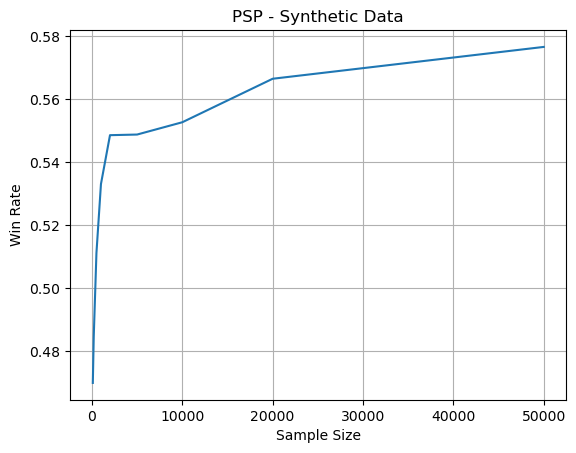

In [9]:
#Plot 
x = size_list
y = scores
plt.plot(x, y)
# plt.axvline(100/np.exp(1), color='red') 
#set title and x, y - axes labels
plt.title('PSP - Synthetic Data')
plt.xlabel('Sample Size')
plt.ylabel('Win Rate')
plt.grid()

# Experiments on Real Data (Dutch Language Score)
# https://zenodo.org/record/2863533#.ZDGJR3ZBxmN

In [10]:
def select_samples(population, random_start=0, num_of_samples=1, size=1000):

    datasets = []
    for i in range(random_start,random_start+num_of_samples):
        # Set the seed for reproducibility
        np.random.seed(i)

        sample = np.random.choice(population, size, replace=False)
        datasets.append(sample)

    return datasets

In [11]:
stex = pd.read_csv('/input/stex.csv',encoding='latin-1')
stex["Speaking"].describe()

count    50235.000000
mean       517.622275
std         37.917385
min        270.000000
25%        494.000000
50%        516.000000
75%        540.000000
max        685.000000
Name: Speaking, dtype: float64

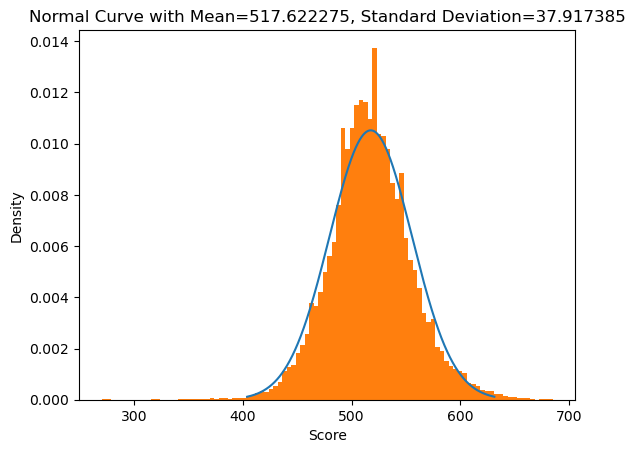

In [12]:
# Set the mean and standard deviation for the normal distribution
mean =  517.622275
std_dev =  37.917385

# Define the mean of x values to plot
x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 1000)

# Calculate the corresponding y values for the normal distribution
y = (1/(std_dev*np.sqrt(2*np.pi))) * np.exp(-(x-mean)**2/(2*std_dev**2))

# Plot the normal curve
plt.plot(x, y)
plt.xlabel('Score')
plt.ylabel('Density')
plt.title(f'Normal Curve with Mean={mean}, Standard Deviation={std_dev}')
plt.hist(stex["Speaking"], bins=100, density=True)
plt.show()

In [13]:
#Log level transformation to remove the skewness (see the tail on the right side)
stex["Speaking_log"]=np.log1p(stex["Speaking"])
stex["Speaking_log"].describe()

count    50235.000000
mean         6.248481
std          0.073672
min          5.602119
25%          6.204558
50%          6.248043
75%          6.293419
max          6.530878
Name: Speaking_log, dtype: float64

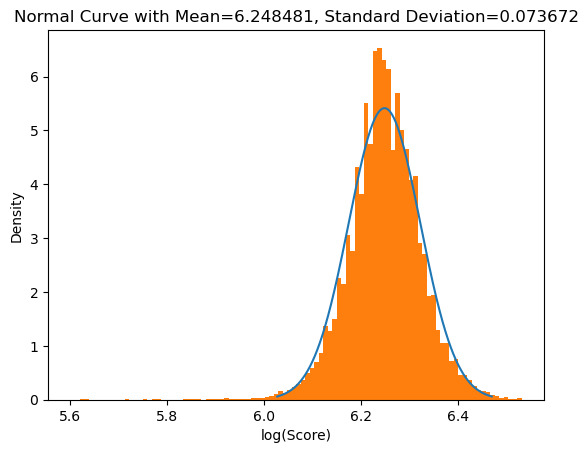

In [14]:
# Set the mean and standard deviation for the normal distribution
mean = 6.248481
std_dev = 0.073672

# Define the mean of x values to plot
x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 1000)

# Calculate the corresponding y values for the normal distribution
y = (1/(std_dev*np.sqrt(2*np.pi))) * np.exp(-(x-mean)**2/(2*std_dev**2))

# Plot the normal curve
plt.plot(x, y)
plt.xlabel('log(Score)')
plt.ylabel('Density')
plt.title(f'Normal Curve with Mean={mean}, Standard Deviation={std_dev}')
plt.hist(stex["Speaking_log"], bins=100, density=True)
plt.show()

In [15]:
# Simulations for different sample sizes
size_list=[100,200,500,1000,2000,5000,7500,10000]
scores=[]
for size_c in size_list:
    samples = select_samples(population=stex["Speaking_log"],random_start=size_c,num_of_samples=10000,size=size_c)
    acc,stop  = partial_information_simulate(samples,0.1)
    scores.append(acc)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in double_scalars



*******Win Rate for size: 100 is: 0.4674 *******

*******Win Rate for size: 200 is: 0.4852 *******

*******Win Rate for size: 500 is: 0.5019 *******

*******Win Rate for size: 1000 is: 0.5097 *******

*******Win Rate for size: 2000 is: 0.5309 *******

*******Win Rate for size: 5000 is: 0.5374 *******

*******Win Rate for size: 7500 is: 0.5361 *******

*******Win Rate for size: 10000 is: 0.5182 *******


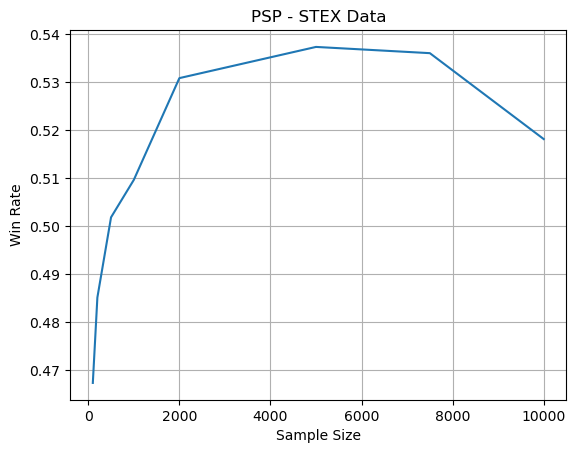

In [16]:
#Plot 
x = size_list
y = scores
plt.plot(x, y)
# plt.axvline(100/np.exp(1), color='red') 
#set title and x, y - axes labels
plt.title('PSP - STEX Data')
plt.xlabel('Sample Size')
plt.ylabel('Win Rate')
plt.grid()